# World Data League 2022

## Notebook Submission Template

This notebook is one of the mandatory deliverables when you submit your solution. Its structure follows the WDL evaluation criteria and it has dedicated cells where you should add information. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work. Make sure to list all the datasets used besides the ones provided.

Instructions:
1. 🧱 Create a separate copy of this template and **do not change** the predefined structure
2. 👥 Fill in the Authors section with the name of each team member
3. 💻 Develop your code - make sure to add comments and save all the output you want the jury to see. Your code **must be** runnable!
4. 📄 Fill in all the text sections
5. 🗑️ Remove this section (‘Notebook Submission Template’) and any instructions inside other sections
6. 📥 Export as HTML and make sure all the visualisations are visible.
7. ⬆️ Upload the .ipynb file to the submission platform.


## 🎯 Challenge
*Waste Production Prediction*


## 👥 Authors
* Mohamed Taha 
* Mohamed Elsherif
* Ahmad Hisham
* Abeer Adel

## 💻 Development
Start coding here! 🐱‍🏍

Create the necessary subsections (e.g. EDA, different experiments, etc..) and markdown cells to include descriptions of your work where you see fit. Comment your code. 

All new subsections must start with three hash characters.

Pro-tip 1: Don't forget to make the jury's life easier. Remove any unnecessary prints before submitting the work. Hide any long output cells (from training a model for example). For each subsection, have a quick introduction (justifying what you are about to do) and conclusion (results you got from what you did). 

Pro-tip 2: Have many similiar graphs which all tell the same story? Add them to the appendix and show only a couple of examples, with the mention that all the others are in the appendix.

In [ ]:
import pandas as pd
import numpy as np
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### The countries dataset

In [ ]:
countries = pd.read_csv('countriesData.csv')
countries = countries.drop_duplicates()
countries = pd.pivot(countries, index = ['Country Name','Country Code'] , columns = 'Series Name' ,values = '2020 [YR2020]'  ).reset_index()
countries

Series Name,Country Name,Country Code,NaN,"Access to electricity, urban (% of urban population)",Adjusted net national income (annual % growth),Adjusted net national income per capita (annual % growth),Adjusted savings: mineral depletion (% of GNI),Adjusted savings: natural resources depletion (% of GNI),Adolescents out of school (% of lower secondary school age),Age dependency ratio (% of working-age population),...,Population growth (annual %),Population living in slums (% of urban population),Renewable energy consumption (% of total final energy consumption),Renewable internal freshwater resources per capita (cubic meters),Research and development expenditure (% of GDP),Rural population (% of total population),"Services, value added (% of GDP)",Trade (% of GDP),Urban population (% of total population),Urban population growth (annual %)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,..,..,..,..,..,..,80.0882594983951,...,2.30381209309418,..,..,..,..,73.974,54.6883422622417,..,26.026,3.35442115854384
2,Africa Eastern and Southern,AFE,NaN,..,..,..,..,..,..,80.8469864586379,...,2.60542748736259,..,..,..,..,63.2166938509081,51.3983561973839,49.8619397250217,36.7833061490919,3.9964003100165
3,Africa Western and Central,AFW,NaN,..,..,..,..,..,..,85.2912705165896,...,2.6609016309306,..,..,..,..,52.1513745647494,45.6080028605277,37.5321008251626,47.8486254352506,3.97727243932519
4,Albania,ALB,NaN,..,..,..,..,..,3.54767990112305,46.9301086542868,...,-0.577942252408581,..,..,..,..,37.888,48.358341994835,60.9699209340559,62.112,0.85386648009412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,West Bank and Gaza,PSE,NaN,..,..,..,..,..,3.05890989303589,71.1658833436022,...,2.48654993848325,..,..,..,..,23.281,..,67.1171431692725,76.719,2.8508765124279
265,World,WLD,NaN,..,..,..,..,..,15.6086502075195,54.5546735058674,...,1.01840551729539,..,..,..,..,43.8436514508449,..,51.6186004412955,56.1563485491551,1.8091145274465
266,"Yemen, Rep.",YEM,NaN,..,..,..,..,..,..,71.7127742961372,...,2.25156062737417,..,..,..,..,62.092,16.7747616272731,..,37.908,3.94085956166852
267,Zambia,ZMB,NaN,..,..,..,..,..,..,85.6989824814854,...,2.88568592086236,..,..,..,..,55.371,53.6163769921681,79.3254878228148,44.629,4.14160925731098


### The City Waste dataset

In [51]:
city_waste = pd.read_csv('city_waste.csv')
city_waste

,iso3c,region_id,country_name,income_id,city_name,additional_data_annual_budget_for_waste_management_year,additional_data_annual_solid_waste_budget_year,additional_data_annual_swm_budget_2017_year,additional_data_annual_swm_budget_year,additional_data_annual_waste_budget_year,...,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent
0,AFG,SAS,Afghanistan,LIC,Jalalabad,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN
1,AFG,SAS,Afghanistan,LIC,Kandahar,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN
2,AFG,SAS,Afghanistan,LIC,Mazar-E-Sharif,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN
3,AFG,SAS,Afghanistan,LIC,Kabul,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,25,NaN
4,AFG,SAS,Afghanistan,LIC,HiratÂ,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,ZWE,SSF,Zimbabwe,LIC,HarareÂ,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
731,ZWE,SSF,Zimbabwe,LIC,Gweru,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
732,ZWE,SSF,Zimbabwe,LIC,Kariba,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,ZWE,SSF,Zimbabwe,LIC,Masvingo City,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# for i in countries.columns:
#     print (i)

In [ ]:
city_waste = city_waste.rename(columns = {'iso3c':'Country Code'})

### Merging First and second datasets

In [ ]:
city_wst_ec = pd.merge (city_waste,countries , how = 'left' , on =  'Country Code')
city_wst_ec.to_csv('merged+.csv', index = False )

### Cleaning the dataset

In [129]:
df=pd.read_csv("merged+loc.csv",na_values="..")
df.head()
df.total_msw_total_msw_generated_tons_year=df.total_msw_total_msw_generated_tons_year.apply(lambda x : x.replace(",","") if (type(x) == str) else x ).astype(np.float64)

In [130]:
np.unique(df.isna().sum(axis=0))

array([  0,   2,   7,   8,  10,  23,  28,  29,  31,  34,  40,  41,  44,
        46,  53,  61,  76,  77,  84,  98, 102, 122, 126, 127, 129, 137,
       175, 179, 204, 212, 213, 215, 217, 221, 226, 228, 237, 238, 239,
       241, 246, 251, 256, 259, 265, 267, 268, 269, 270, 271, 279, 283,
       287, 288, 290, 294, 300, 301, 307, 308, 311, 319, 321, 327, 337,
       338, 339, 341, 342, 343, 344, 347, 348, 349, 351, 353, 354, 355,
       356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367])

In [131]:
columns_20=["Country Name"]
for column,nans in zip(df.columns,df.isna().sum(axis=0)):
    if nans>200:
        columns_20.append(column)
# columns_10=["Country Name"]
# for column,nans in zip(df.columns,df.isna().sum(axis=0)):
#     if nans>46:
#         columns_10.append(column)


In [ ]:
'total_msw_total_msw_generated_tons_year' in columns_20

False

In [132]:
# df_10=df.drop(axis=1,columns=columns_10)
# df_10 = df_10.dropna(subset = ['total_msw_total_msw_generated_tons_year'])

df_20=df.drop(axis=1,columns=columns_20)
df_20 = df_20.dropna(subset = ['total_msw_total_msw_generated_tons_year'])


In [ ]:
df_20.describe().T

,count,mean,std,min,25%,50%,75%,max
composition_food_organic_waste_percent,265.0,4.611742e+01,1.768616e+01,1.045500e+00,3.500000e+01,4.840000e+01,5.740000e+01,8.500000e+01
composition_glass_percent,245.0,4.057508e+00,4.041309e+00,0.000000e+00,1.470000e+00,3.000000e+00,5.000000e+00,3.258000e+01
composition_metal_percent,242.0,2.838973e+00,2.898991e+00,1.000000e-02,1.000000e+00,2.000000e+00,3.800000e+00,2.570000e+01
composition_other_percent,264.0,2.005126e+01,1.475884e+01,5.000000e-01,9.082500e+00,1.690000e+01,2.629750e+01,8.887000e+01
composition_paper_cardboard_percent,264.0,1.262151e+01,8.584126e+00,8.000000e-02,6.500000e+00,1.100000e+01,1.700000e+01,5.000000e+01
composition_plastic_percent,258.0,1.129608e+01,6.137778e+00,1.000000e-02,7.010000e+00,1.100000e+01,1.476000e+01,4.800000e+01
population_population_number_of_people,326.0,1.719920e+06,2.708494e+06,7.500000e+03,2.100000e+05,7.125000e+05,1.928500e+06,2.038400e+07
total_msw_total_msw_generated_tons_year,326.0,5.830133e+05,1.004925e+06,8.723500e+02,5.392875e+04,2.177520e+05,5.454375e+05,7.903000e+06
Age dependency ratio (% of working-age population),321.0,5.833339e+01,1.464480e+01,1.810329e+01,4.866462e+01,5.365163e+01,6.742428e+01,1.095033e+02
"Agriculture, forestry, and fishing, value added (% of GDP)",302.0,1.362840e+01,9.776077e+00,3.387504e-01,5.516993e+00,1.168229e+01,1.839808e+01,5.948740e+01


## Model

In [111]:
# !pip install catboost
columns = [
           'population_population_number_of_people',
    'composition_glass_percent',
            'composition_food_organic_waste_percent', 
               'composition_metal_percent', 'composition_other_percent',
           'composition_paper_cardboard_percent', 'composition_plastic_percent',
            
       'Age dependency ratio (% of working-age population)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Exports as a capacity to import (constant LCU)',
       'Exports of goods and services (% of GDP)',
       'Final consumption expenditure (% of GDP)',
       'Forest area (% of land area)', 'GDP per capita (current US$)',
       'Gross capital formation (% of GDP)',
       'Gross national expenditure (% of GDP)', 'Gross savings (% of GDP)',
       'Manufacturing, value added (% of GDP)',
       'Net primary income (Net income from abroad) (current US$)',
       'Net secondary income (Net current transfers from abroad) (current US$)',
       'New business density (new registrations per 1,000 people ages 15-64)',
       'People practicing open defecation, urban (% of urban population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services, urban (% of urban population)',
       'People using safely managed sanitation services, urban (% of urban population)',
       'Population ages 0-14 (% of total population)',
       'Population ages 15-64 (% of total population)',
       'Population ages 65 and above (% of total population)',
       'Population growth (annual %)',
       'Rural population (% of total population)',
       'Services, value added (% of GDP)', 'Trade (% of GDP)',
       'Urban population (% of total population)', 
       'Urban population growth (annual %)']

scaled = ['Exports as a capacity to import (constant LCU)' , 
         'Net primary income (Net income from abroad) (current US$)',
          'Net primary income (Net income from abroad) (current US$)',
         'GDP per capita (current US$)'
         , 'population_population_number_of_people'
         ]

#   'composition_glass_percent',
# 'institutional_framework_department_dedicated_to_solid_waste_management_na',
#        'legal_framework_long_term_integrated_solid_waste_master_plan_na',
#        'legal_framework_solid_waste_management_rules_and_regulations_na',
#         'primary_collection_mode_form_of_primary_collection_na',
#        'separation_existence_of_source_separation_na',

In [124]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [154]:
n = 2
for i in range (1,n):  
    try:
        var = i*0.01
        print (var)
        train_df, test_df = train_test_split(df_20, test_size=0.15, random_state=42) 
        x_train = train_df[columns]
        # scaler.fit(x_train[scaled])
        # x_train[scaled] = scaler.transform(x_train[scaled])
        
        y_train = train_df['total_msw_total_msw_generated_tons_year']
        x_test = test_df[columns]
        # x_test[scaled] = scaler.transform(x_test[scaled])
        y_test = test_df['total_msw_total_msw_generated_tons_year']

        model = cb.CatBoostRegressor(loss_function='RMSE'   ,depth= 5,
            iterations= 500,
             subsample= 0.29,
             learning_rate= 0.075,
             l2_leaf_reg= 0.0004, silent=True)
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        rmse = (np.sqrt(mean_squared_error(y_test, pred))) / 1000
        r2 = r2_score(y_test, pred)
        print("“Testing performance”")
        print('‘RMSE: {:.2f} K’'.format(rmse) , '‘R2: {:.4f}’'.format(r2) )
    except Exception as e:
        print(e)

0.01
“Testing performance”
‘RMSE: 259.18 K’ ‘R2: 0.9377’


In [137]:
df_20[ ['country_name','city_name', 'total_msw_total_msw_generated_tons_year','population_population_number_of_people']].head(20)

,country_name,city_name,total_msw_total_msw_generated_tons_year,population_population_number_of_people
0,Afghanistan,Jalalabad,58914.45,326585.0
1,Afghanistan,Kandahar,120971.00,429000.0
2,Afghanistan,Mazar-E-Sharif,52368.40,635250.0
3,Afghanistan,Kabul,1989250.00,3700000.0
4,Afghanistan,HiratÂ,91644.70,337000.0
5,Angola,Luanda,1316336.00,4508000.0
6,Albania,Korca,21000.00,51152.0
7,Albania,Vlora,37955.00,79513.0
8,United Arab Emirates,Abu Dhabi,1033543.00,1145000.0
9,United Arab Emirates,Dubai,2689808.00,2415000.0


## 🖼️ Visualisations
Copy here the most important visualizations (graphs, charts, maps, images, etc). You can refer to them in the Executive Summary.

Technical note: If not all the visualisations are visible, you can still include them as an image or link - in this case please upload them to your own repository.

Text(0.5, 0, 'CatBoost Feature Importance')

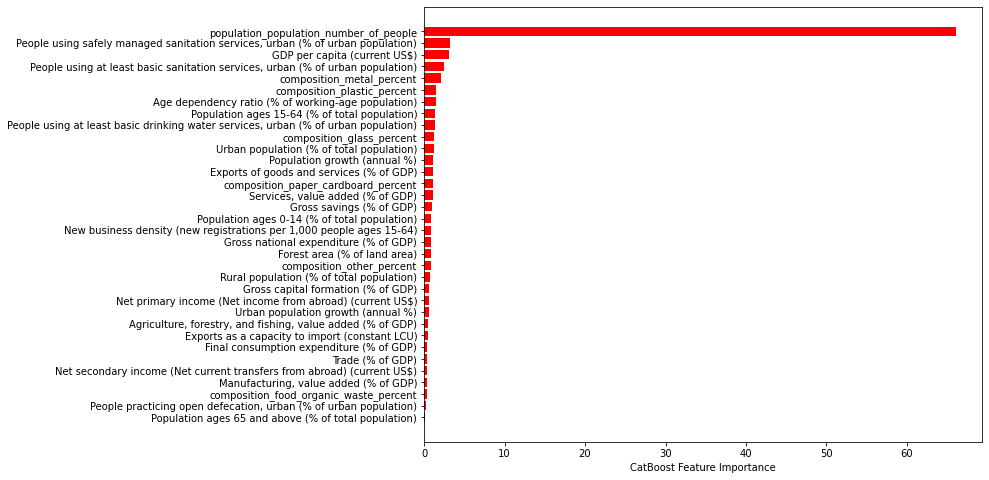

In [126]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.figure(figsize=(10,8))
plt.barh(x_train.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], color='red')
plt.xlabel("CatBoost Feature Importance")

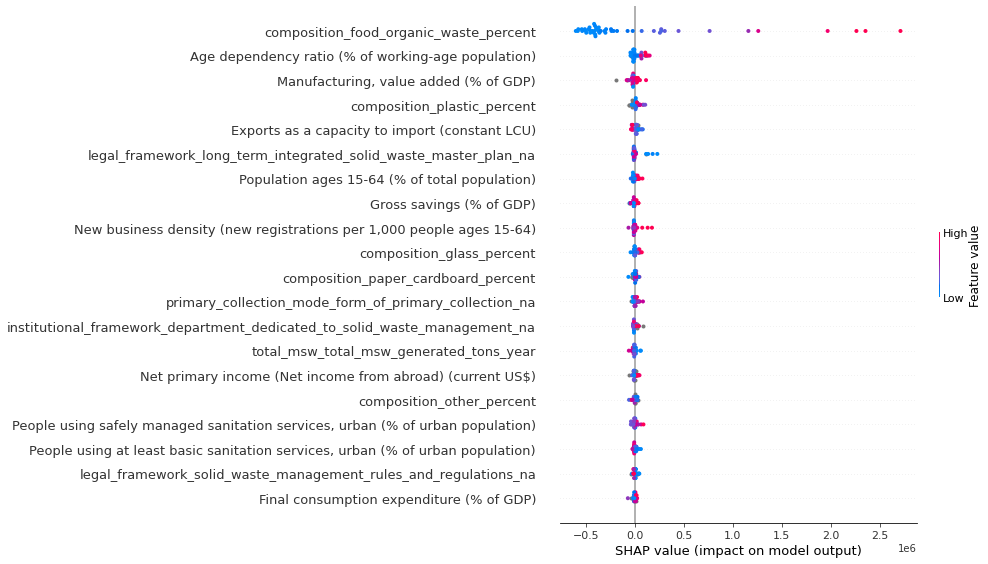

In [127]:
# !pip install shap
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, feature_names = df_20.drop(columns = ['Country Code','region_id', 'country_name','income_id','city_name']).columns)

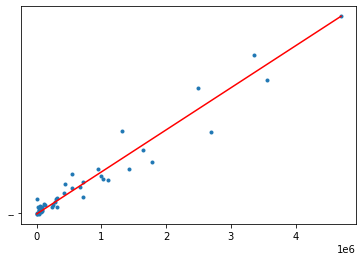

In [149]:
tatal_df = x_test.copy()
tatal_df['true'] = y_test
tatal_df['pred'] = pred
tatal_df['diff'] = y_test - pred

tatal_df.drop(columns  = x_test.columns)
plt.plot(tatal_df['true'], tatal_df['pred'] , '.')
plt.plot([tatal_df['true'].min(),tatal_df['true'].max() ] ,[tatal_df['pred'].min(),tatal_df['pred'].max() ] , 'r' , '--' )

plt.show()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


85    0.407243
Name: total_msw_total_msw_generated_tons_year, dtype: float64

## 👓 References
List all of the external links (even if they are already linked above), such as external datasets, papers, blog posts, code repositories and any other materials.

## ⏭️ Appendix
Add here any code, images or text that you still find relevant, but that was too long to include in the main report. This section is optional.


In [ ]:
import googlemaps

### The Emmissions dataset

In [ ]:
emmissions = pd.read_csv('data/city_emmissions.csv')
emmissions = emmissions.dropna(subset=['City Location']).reset_index()

emmissions

,index,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Access,City-wide emissions inventory,Accounting year,...,TOTAL Scope 3 Emissions,TOTAL BASIC Emissions (GPC),TOTAL BASIC+ Emissions (GPC),Change in emissions,Primary reason for the change in emissions,Land area (in square km),Population,Population Year,City Location,Last update
0,0,2020,50541,City of Greensboro,Greensboro,United States of America,North America,public,Intending to undertake in the next 2 years,NaN,...,NaN,NaN,NaN,NaN,NaN,350.30,296710.0,2019,POINT (-79.792 36.0726),2021-07-16T02:03:37.903
1,1,2020,60264,Prefeitura de Botucatu,Botucatu,Brazil,Latin America,public,Intending to undertake in the next 2 years,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,144000.0,2019,POINT (-48.4441 -22.8852),2021-07-16T02:03:37.903
2,2,2020,74508,"City of Winona, MN",Winona,United States of America,North America,public,Yes,2019-01-01 - 2019-12-31,...,NaN,NaN,NaN,Decreased,NaN,39.20,26594.0,2019,POINT (-91.6663 44.0554),2021-07-16T02:03:37.903
3,4,2020,54706,Prefeitura Municipal de Boa Vista,Boa Vista,Brazil,Latin America,public,In progress,-,...,NaN,NaN,NaN,NaN,NaN,5687036.00,576568.0,2018,POINT (-60.6779 2.83067),2021-07-16T02:03:37.903
4,5,2020,36043,Abuja Federal Capital Territory,Abuja,Nigeria,Africa,public,Intending to undertake in the next 2 years,NaN,...,NaN,NaN,NaN,NaN,NaN,7315.00,3278000.0,2020,POINT (7.39857 9.07647),2021-07-16T02:03:37.903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,765,2020,19233,Município de Torres Vedras,Torres Vedras,Portugal,Europe,public,Yes,2014-01-01 - 2014-12-31,...,NaN,NaN,NaN,Decreased,Financial conditions,407.00,79465.0,2011,POINT (-9.30148 38.7637),2021-07-16T02:03:37.903
466,766,2020,74531,Santa Fe County,Santa Fe County,United States of America,North America,public,In progress,-,...,NaN,NaN,NaN,NaN,NaN,4950.00,150358.0,2019,POINT (-106 35.5),2021-07-16T02:03:37.903
467,770,2020,43912,City of Edmonton,Edmonton,Canada,North America,public,Yes,2019-01-01 - 2019-12-31,...,NaN,NaN,NaN,Decreased,"Other, please specify: Cooler summer, and more...",689.94,972223.0,2019,POINT (-113.491 53.5444),2021-07-16T02:03:37.903
468,772,2020,43905,City of San Antonio,San Antonio,United States of America,North America,public,Yes,2016-01-01 - 2016-12-31,...,NaN,NaN,NaN,Decreased,Technological change,1204.30,1547253.0,2019,POINT (-98.4936 29.4241),2021-07-16T02:03:37.903


In [ ]:
import numpy as np
# for city in emmissions['City']: #==city_waste['city_name']
emmissions = emmissions.dropna(subset=['City Location'])

for i in range (len (emmissions)):
    try:
        emmissions['City Location'][i] = emmissions['City Location'][i].replace( 'POINT (' , '').replace(')','').split(' ')
    except:
        print(i)
# Here the lattitute will be of index 1 and longitude of index 0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
#!pip install geopy
match = 0
for i in range(len(emmissions)):
    for j in range(len(city_wst_ec)):

        # i = 0
        # j = 360
        try:
            distance = emmissions['City Location'][i][1], emmissions['City Location'][i][0]
            coords_1 = (float(emmissions['City Location'][i][1]), float(emmissions['City Location'][i][0]))
        
            # print(type(float(coords_1[0])) ,coords_1[0], type(coords_2[0]))

            coords_2 = (city_wst_ec['lat'][j], city_wst_ec['lng'][j])
            distance = geopy.distance.geodesic(coords_1, coords_2).km

            if (distance < 100):
                print ('distance between' , emmissions['City'][i] , ' and ' , city_wst_ec['city_name'][j]  , distance )
                match +=1

            
        except :
            print(i)

print (match)

distance between Zürich  and  Bern 95.08015681666254
distance between Zürich  and  Zurich 0.9406505813872058
distance between Yokohama  and  Yokohama 0.004373579588492877
distance between Bologna  and  Parma 87.1696994778295
distance between Stockholm  and  Stockholm 0.002836914641866516
distance between Victoria  and  Vancouver 96.69691822664495
distance between Accra  and  Accra 4.717314621992635
distance between Lisbon  and  Lisbon 0.0053151657047294356
distance between Karachi  and  Karachi 13.976218753522044
distance between Buenos Aires  and  Ciudada AutÃ³noma De Buenos Aires (Caba). 0.00413150427664629
distance between Roskilde  and  Copenhagen 30.48412508819886
distance between La Marsa  and  Tunis 14.498180563697911
distance between Hoeje-Taastrup  and  Copenhagen 17.666213392804533
distance between Brussels  and  Brussels 0.6709306145397413
distance between Brussels  and  Liege 89.51614016042893
distance between Chapala  and  Guadalajara 43.51226146025406
distance between Dur